### Importación de datos



In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [21]:
Ingreso_tienda1 = tienda1['Precio'].sum()
Ingreso_tienda2 = tienda2['Precio'].sum()
Ingreso_tienda3 = tienda3['Precio'].sum()
Ingreso_tienda4 = tienda4['Precio'].sum()

Ingreso_tienda1_ = tienda1['Precio'].sum() / 1000000
Ingreso_tienda2_ = tienda2['Precio'].sum() / 1000000
Ingreso_tienda3_ = tienda3['Precio'].sum() / 1000000
Ingreso_tienda4_ = tienda4['Precio'].sum() / 1000000

print(f'El ingreso de la tienda 1 fue {Ingreso_tienda1_:,.2f} millones de dolares')
print(f'El ingreso de la tienda 2 fue {Ingreso_tienda2_:,.2f} millones de dolares')
print(f'El ingreso de la tienda 3 fue {Ingreso_tienda3_:,.2f} millones de dolares')
print(f'El ingreso de la tienda 4 fue {Ingreso_tienda4_:,.2f} millones de dolares')

El ingreso de la tienda 1 fue 1,150.88 millones de dolares
El ingreso de la tienda 2 fue 1,116.34 millones de dolares
El ingreso de la tienda 3 fue 1,098.02 millones de dolares
El ingreso de la tienda 4 fue 1,038.38 millones de dolares


# 2. Ventas por categoría

In [22]:
ingreso_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto')['Precio'].sum() / 1000000
ingreso_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto')['Precio'].sum() / 1000000
ingreso_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto')['Precio'].sum() / 1000000
ingreso_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto')['Precio'].sum() / 1000000

ingreso_por_categoria_tienda1_sorted = ingreso_por_categoria_tienda1.sort_values(ascending=False)
ingreso_por_categoria_tienda2_sorted = ingreso_por_categoria_tienda2.sort_values(ascending=False)
ingreso_por_categoria_tienda3_sorted = ingreso_por_categoria_tienda3.sort_values(ascending=False)
ingreso_por_categoria_tienda4_sorted = ingreso_por_categoria_tienda4.sort_values(ascending=False)


In [23]:
#Ingreso por categoría en monto monetario
Ingreso_por_categoria_df = pd.DataFrame({
    'Tienda 1': ingreso_por_categoria_tienda1,
    'Tienda 2': ingreso_por_categoria_tienda2,
    'Tienda 3': ingreso_por_categoria_tienda3,
    'Tienda 4': ingreso_por_categoria_tienda4,
}).fillna(0).sort_values(by='Tienda 1', ascending=False)




print('Ingreso por categoría (en millones de dolares) \n',Ingreso_por_categoria_df)


Ingreso por categoría (en millones de dolares) 
                          Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Electrónicos             429.4935  410.8311  410.7758  409.4761
Electrodomésticos        363.6852  348.5678  329.2379  283.2602
Muebles                  187.6337  176.4263  201.0721  192.5289
Instrumentos musicales    91.2990  104.9903   77.3809   75.1024
Deportes y diversión      39.2900   34.7445   35.5931   33.3501
Juguetes                  17.9957   15.9454   19.4011   20.2622
Artículos para el hogar   12.6984   14.7469   15.0600   15.0745
Libros                     8.7849   10.0912    9.4987    9.3213


In [24]:
#Conteo de ventas por categoría

conteo_por_categoria_tienda1 = tienda1.groupby('Categoría del Producto').size().reset_index(name = "Cantidad").set_index('Categoría del Producto')
conteo_por_categoria_tienda2 = tienda2.groupby('Categoría del Producto').size().reset_index(name = "Cantidad").set_index('Categoría del Producto')
conteo_por_categoria_tienda3 = tienda3.groupby('Categoría del Producto').size().reset_index(name = "Cantidad").set_index('Categoría del Producto')
conteo_por_categoria_tienda4 = tienda4.groupby('Categoría del Producto').size().reset_index(name = "Cantidad").set_index('Categoría del Producto')


Conteo_por_categoria_df = pd.DataFrame({
    'Tienda 1': conteo_por_categoria_tienda1['Cantidad'],
    'Tienda 2': conteo_por_categoria_tienda2['Cantidad'],
    'Tienda 3': conteo_por_categoria_tienda3['Cantidad'],
    'Tienda 4': conteo_por_categoria_tienda4['Cantidad'],
}).fillna(0).sort_values(by='Tienda 1', ascending = False)




print('Conteo por categoría \n',Conteo_por_categoria_df)


Conteo por categoría 
                          Tienda 1  Tienda 2  Tienda 3  Tienda 4
Categoría del Producto                                         
Muebles                       465       442       499       480
Electrónicos                  448       422       451       451
Juguetes                      324       313       315       338
Electrodomésticos             312       305       278       254
Deportes y diversión          284       275       277       277
Instrumentos musicales        182       224       177       170
Libros                        173       197       185       187
Artículos para el hogar       171       181       177       201


In [25]:
Maximos_por_categoria_df = pd.DataFrame({
     'Tienda 1': (ingreso_por_categoria_tienda1.idxmax(), ingreso_por_categoria_tienda1.max()),
     'Tienda 2': (ingreso_por_categoria_tienda2.idxmax(), ingreso_por_categoria_tienda2.max()),
     'Tienda 3': (ingreso_por_categoria_tienda3.idxmax(), ingreso_por_categoria_tienda3.max()),
     'Tienda 4': (ingreso_por_categoria_tienda4.idxmax(), ingreso_por_categoria_tienda4.max()),
     })

print('Ingreso por categoría (en millones de dolares) \n',Maximos_por_categoria_df)


Ingreso por categoría (en millones de dolares) 
        Tienda 1      Tienda 2      Tienda 3      Tienda 4
0  Electrónicos  Electrónicos  Electrónicos  Electrónicos
1      429.4935      410.8311      410.7758      409.4761


In [26]:
#Esto no deberia ser con el de ingreso sino el contador


maximo_categoria_tienda1 = ingreso_por_categoria_tienda1.idxmax(), ingreso_por_categoria_tienda1.max()
maximo_categoria_tienda2 = ingreso_por_categoria_tienda2.idxmax(), ingreso_por_categoria_tienda2.max()
maximo_categoria_tienda3 = ingreso_por_categoria_tienda3.idxmax(), ingreso_por_categoria_tienda3.max()
maximo_categoria_tienda4 = ingreso_por_categoria_tienda4.idxmax(), ingreso_por_categoria_tienda4.max()

print(f'Los máximos por categoria de la tienda 1 son: {maximo_categoria_tienda1}')
print(f'Los máximos por categoria de la tienda 2 son: {maximo_categoria_tienda2}')
print(f'Los máximos por categoria de la tienda 3 son: {maximo_categoria_tienda3}')
print(f'Los máximos por categoria de la tienda 4 son: {maximo_categoria_tienda4}')

Los máximos por categoria de la tienda 1 son: ('Electrónicos', 429.4935)
Los máximos por categoria de la tienda 2 son: ('Electrónicos', 410.8311)
Los máximos por categoria de la tienda 3 son: ('Electrónicos', 410.7758)
Los máximos por categoria de la tienda 4 son: ('Electrónicos', 409.4761)


In [27]:
minimo_categoria_tienda1 = ingreso_por_categoria_tienda1.idxmin(), ingreso_por_categoria_tienda1.min()
minimo_categoria_tienda2 = ingreso_por_categoria_tienda2.idxmin(), ingreso_por_categoria_tienda2.min()
minimo_categoria_tienda3 = ingreso_por_categoria_tienda3.idxmin(), ingreso_por_categoria_tienda3.min()
minimo_categoria_tienda4 = ingreso_por_categoria_tienda4.idxmin(), ingreso_por_categoria_tienda4.min()

print(f'Los mínimos por categoria de la tienda 1 son: {minimo_categoria_tienda1}')
print(f'Los mínimos por categoria de la tienda 2 son: {minimo_categoria_tienda2}')
print(f'Los mínimos por categoria de la tienda 3 son: {minimo_categoria_tienda3}')
print(f'Los mínimos por categoria de la tienda 4 son: {minimo_categoria_tienda4}')

Los mínimos por categoria de la tienda 1 son: ('Libros', 8.7849)
Los mínimos por categoria de la tienda 2 son: ('Libros', 10.0912)
Los mínimos por categoria de la tienda 3 son: ('Libros', 9.4987)
Los mínimos por categoria de la tienda 4 son: ('Libros', 9.3213)


# 3. Calificación promedio de la tienda


In [28]:
qual_Tienda1 = tienda1['Calificación'].mean()
qual_Tienda2 = tienda2['Calificación'].mean()
qual_Tienda3 = tienda3['Calificación'].mean()
qual_Tienda4 = tienda4['Calificación'].mean()

print(f'La calificación de la tienda 1 fue {qual_Tienda1:,.2f}')
print(f'La calificación de la tienda 2 fue {qual_Tienda2:,.2f}')
print(f'La calificación de la tienda 3 fue {qual_Tienda3:,.2f}')
print(f'La calificación de la tienda 4 fue {qual_Tienda4:,.2f}')

La calificación de la tienda 1 fue 3.98
La calificación de la tienda 2 fue 4.04
La calificación de la tienda 3 fue 4.05
La calificación de la tienda 4 fue 4.00


# 4. Productos más y menos vendidos

In [29]:
contador_tienda1 = tienda1.groupby('Producto')['Producto'].count()
contador_tienda2 = tienda2.groupby('Producto')['Producto'].count()
contador_tienda3 = tienda3.groupby('Producto')['Producto'].count()
contador_tienda4 = tienda4.groupby('Producto')['Producto'].count()

menos_vendido_tienda1 = contador_tienda1.idxmin()
menos_vendido_tienda2 = contador_tienda2.idxmin()
menos_vendido_tienda3 = contador_tienda3.idxmin()
menos_vendido_tienda4 = contador_tienda4.idxmin()

mas_vendido_tienda1 = contador_tienda1.idxmax()
mas_vendido_tienda2 = contador_tienda2.idxmax()
mas_vendido_tienda3 = contador_tienda3.idxmax()
mas_vendido_tienda4 = contador_tienda4.idxmax()



print(f'El producto menos vendido en la tienda 1 fue "{menos_vendido_tienda1}" y el más vendido fue "{mas_vendido_tienda1}"')
print(f'El producto menos vendido en la tienda 2 fue "{menos_vendido_tienda2}" y el más vendido fue "{mas_vendido_tienda2}"')
print(f'El producto menos vendido en la tienda 3 fue "{menos_vendido_tienda3}" y el más vendido fue "{mas_vendido_tienda3}"')
print(f'El producto menos vendido en la tienda 4 fue "{menos_vendido_tienda4}" y el más vendido fue "{mas_vendido_tienda4}"')



El producto menos vendido en la tienda 1 fue "Auriculares con micrófono" y el más vendido fue "Armario"
El producto menos vendido en la tienda 2 fue "Juego de mesa" y el más vendido fue "Iniciando en programación"
El producto menos vendido en la tienda 3 fue "Bloques de construcción" y el más vendido fue "Kit de bancas"
El producto menos vendido en la tienda 4 fue "Guitarra eléctrica" y el más vendido fue "Cama box"


# 5. Envío promedio por tienda

In [30]:
envio_promedio_tienda1 = tienda1['Costo de envío'].mean()
envio_promedio_tienda2 = tienda2['Costo de envío'].mean()
envio_promedio_tienda3 = tienda3['Costo de envío'].mean()
envio_promedio_tienda4 = tienda4['Costo de envío'].mean()




##Grafico de envio promedio por tienda

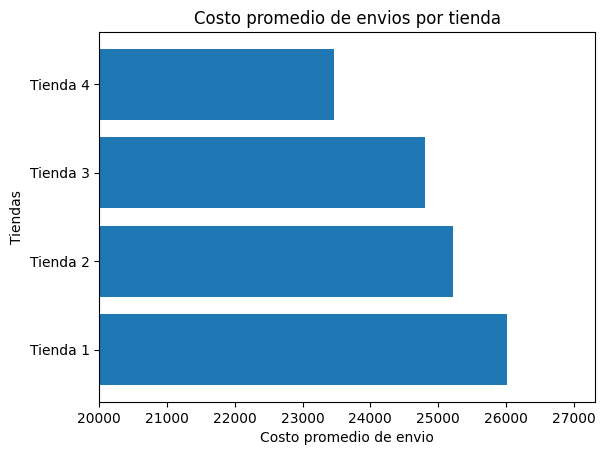

In [31]:
x_ingreso_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
y_ingreso_tiendas = [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]

plt.barh(x_ingreso_tiendas, y_ingreso_tiendas)
plt.xlim(left = 20000)
plt.title('Costo promedio de envios por tienda')
plt.ylabel('Tiendas')
plt.xlabel('Costo promedio de envio')
plt.show()

# 6. Informe resumen

In [32]:
informe = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2','Tienda 3', 'Tienda 4'],
    'Ingreso': [Ingreso_tienda1, Ingreso_tienda2, Ingreso_tienda3, Ingreso_tienda4],
    'Cantidad de ventas': [len(tienda1), len(tienda2), len(tienda3), len(tienda4)],
    'Mejor categoria': [maximo_categoria_tienda1,maximo_categoria_tienda2,maximo_categoria_tienda3,maximo_categoria_tienda4],
    'Peor categoria': [minimo_categoria_tienda1,minimo_categoria_tienda2,minimo_categoria_tienda3,minimo_categoria_tienda4],
    'Calificacion': [qual_Tienda1, qual_Tienda2, qual_Tienda3, qual_Tienda4],
    'Costo promedio de envio': [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4],
    'Producto mas vendido': [mas_vendido_tienda1, mas_vendido_tienda2, mas_vendido_tienda3, mas_vendido_tienda4],
    'Producto menos vendido': [menos_vendido_tienda1, menos_vendido_tienda2, menos_vendido_tienda3, menos_vendido_tienda4]
  }).set_index('Tienda')

print(informe.T)

Tienda                                    Tienda 1                   Tienda 2  \
Ingreso                               1150880400.0               1116343500.0   
Cantidad de ventas                            2359                       2359   
Mejor categoria           (Electrónicos, 429.4935)   (Electrónicos, 410.8311)   
Peor categoria                    (Libros, 8.7849)          (Libros, 10.0912)   
Calificacion                              3.976685                   4.037304   
Costo promedio de envio                26018.60958               25216.235693   
Producto mas vendido                       Armario  Iniciando en programación   
Producto menos vendido   Auriculares con micrófono              Juego de mesa   

Tienda                                   Tienda 3                  Tienda 4  
Ingreso                              1098019600.0              1038375700.0  
Cantidad de ventas                           2359                      2358  
Mejor categoria          (Electrónic

# 7. Graficos

##Grafico de barras verticales del ingreso

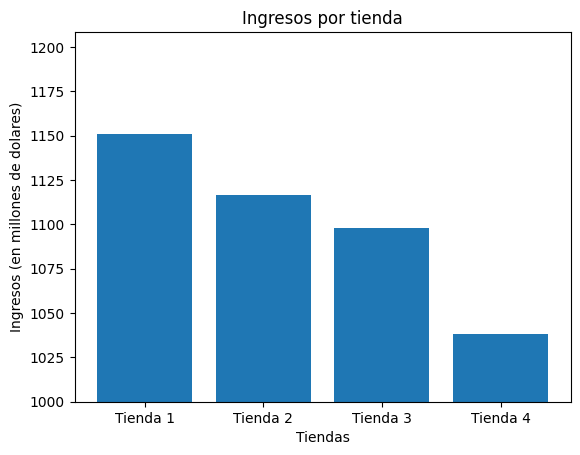

In [33]:
x_ingreso_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
y_ingreso_tiendas = [Ingreso_tienda1_, Ingreso_tienda2_, Ingreso_tienda3_, Ingreso_tienda4_]

plt.bar(x_ingreso_tiendas, y_ingreso_tiendas)
plt.ylim(bottom = 1000)
plt.title('Ingresos por tienda')
plt.xlabel('Tiendas')
plt.ylabel('Ingresos (en millones de dolares)')
plt.show()

##Grafico de torta sobre distribución de venta de productos por tienda

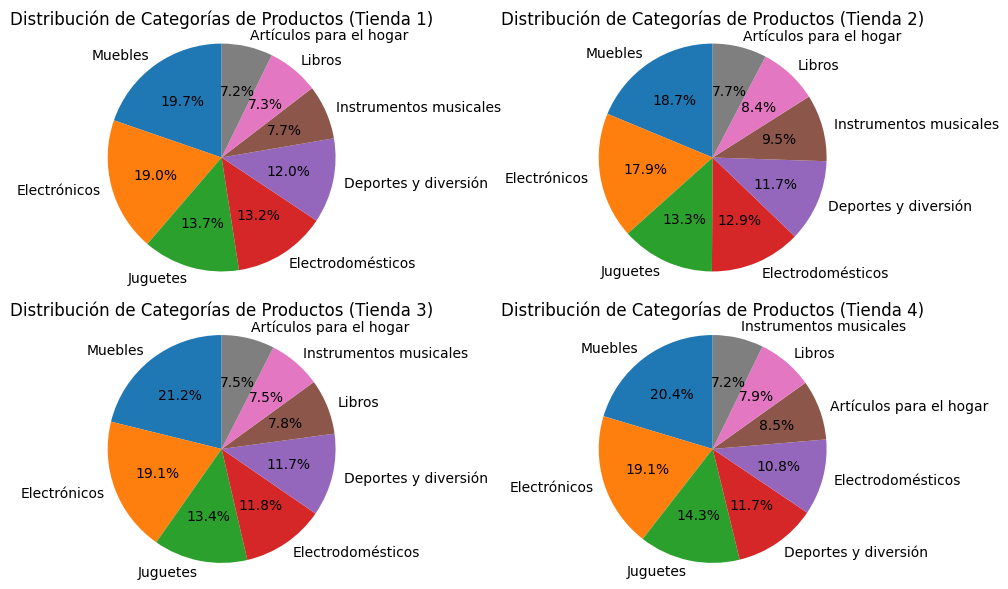

In [36]:
tiendas_bd = [tienda1, tienda2, tienda3, tienda4]  # Lista de DataFrames de las tiendas
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

fig, axes = plt.subplots(2, 2, figsize=(10, 6))  # Crear una cuadrícula de 2x2 para los gráficos

for i, tienda_df in enumerate(tiendas_bd):
    # Calcular la distribución de categorías de productos para la tienda actual
    categorias = tienda_df['Categoría del Producto'].value_counts().index
    cantidades = tienda_df['Categoría del Producto'].value_counts().values

    # Obtener el subplot correspondiente
    ax = axes[i // 2, i % 2]  # Calcular la posición del subplot en la cuadrícula

    # Crear el gráfico de pastel para la tienda actual
    ax.pie(cantidades, labels=categorias, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Distribución de Categorías de Productos ({tiendas[i]})')
    ax.axis('equal')  # Para que el gráfico sea circular

plt.tight_layout()  # Ajustar el espacio entre los subplots
plt.show()  # Mostrar el gráfico


##Grafico de lineas de Ventas por mes

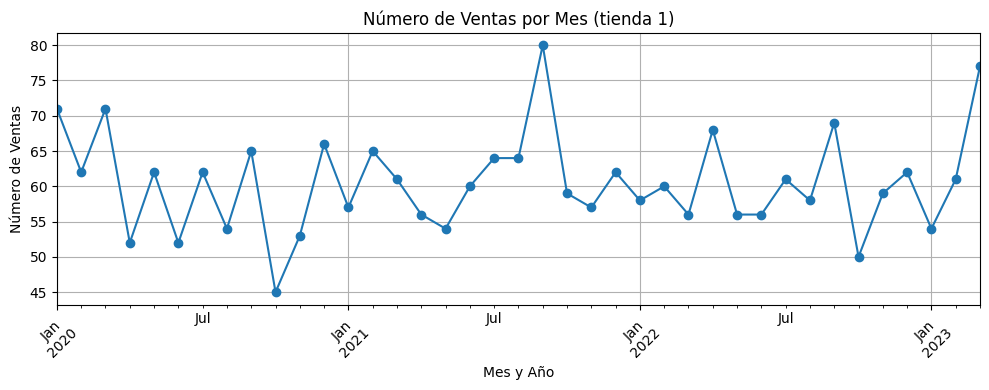

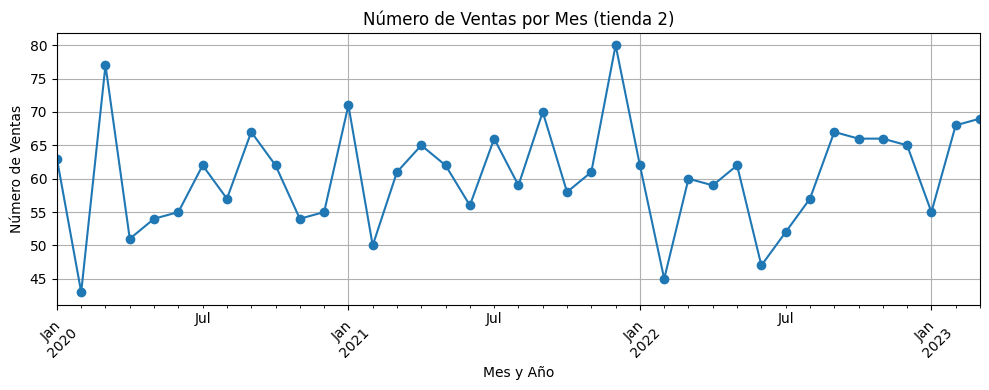

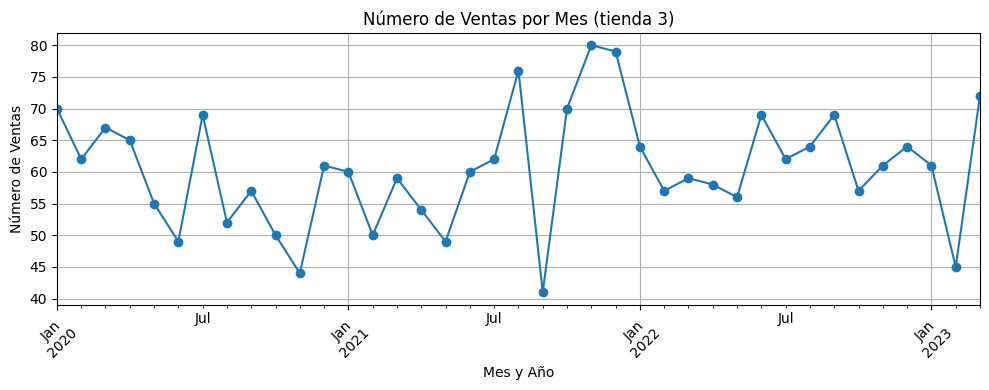

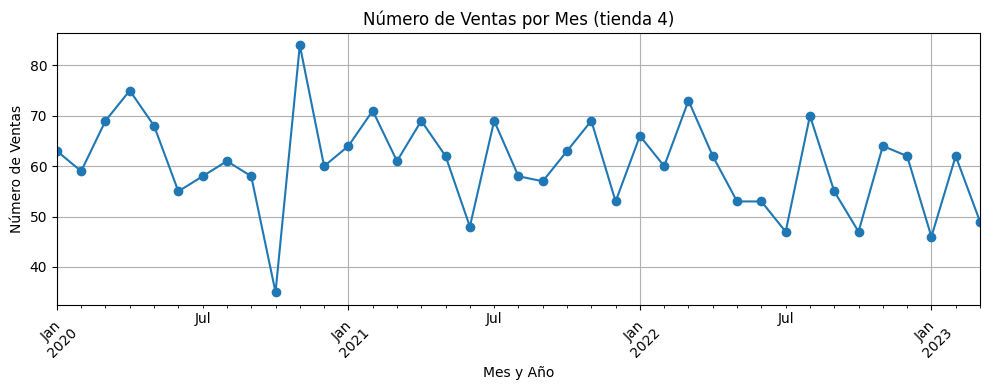

In [15]:
def grafico_lineas(tienda__, nombre):
    tienda_fechas = pd.DataFrame(tienda__)
    tienda_fechas['Fecha de Compra'] = pd.to_datetime(tienda_fechas['Fecha de Compra'], format='%d/%m/%Y')
    tienda_fechas['Mes_Anio_Compra'] = tienda_fechas['Fecha de Compra'].dt.to_period('M')
    ventas_por_mes = tienda_fechas.groupby('Mes_Anio_Compra').size()
    ventas_por_mes = ventas_por_mes.sort_index()


    plt.figure(figsize=(10, 4))
    ventas_por_mes.plot(kind='line', marker='o')
    plt.title(f'Número de Ventas por Mes ({nombre})')
    plt.xlabel('Mes y Año')
    plt.ylabel('Número de Ventas')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

grafico_lineas(tienda1,'tienda 1')
grafico_lineas(tienda2,'tienda 2')
grafico_lineas(tienda3,'tienda 3')
grafico_lineas(tienda4,'tienda 4')




# 8. Análisis

In [43]:
informe = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2','Tienda 3', 'Tienda 4'],
    'Ingreso (En millones)': [Ingreso_tienda1_, Ingreso_tienda2_, Ingreso_tienda3_, Ingreso_tienda4_],
    'Mejor categoria': [maximo_categoria_tienda1,maximo_categoria_tienda2,maximo_categoria_tienda3,maximo_categoria_tienda4],
    'Peor categoria': [minimo_categoria_tienda1,minimo_categoria_tienda2,minimo_categoria_tienda3,minimo_categoria_tienda4],
    'Calificacion': [qual_Tienda1, qual_Tienda2, qual_Tienda3, qual_Tienda4],
    'Producto mas vendido': [mas_vendido_tienda1, mas_vendido_tienda2, mas_vendido_tienda3, mas_vendido_tienda4],
    'Producto menos vendido': [menos_vendido_tienda1, menos_vendido_tienda2, menos_vendido_tienda3, menos_vendido_tienda4],
    'Costo promedio de envio': [envio_promedio_tienda1, envio_promedio_tienda2, envio_promedio_tienda3, envio_promedio_tienda4]
  }).set_index('Tienda')

informe.head()

,Ingreso (En millones),Mejor categoria,Peor categoria,Calificacion,Producto mas vendido,Producto menos vendido,Costo promedio de envio
Tienda,,,,,,,
Tienda 1,1150.8804,"(Electrónicos, 429.4935)","(Libros, 8.7849)",3.976685,Armario,Auriculares con micrófono,26018.609580
Tienda 2,1116.3435,"(Electrónicos, 410.8311)","(Libros, 10.0912)",4.037304,Iniciando en programación,Juego de mesa,25216.235693
Tienda 3,1098.0196,"(Electrónicos, 410.7758)","(Libros, 9.4987)",4.048326,Kit de bancas,Bloques de construcción,24805.680373
Tienda 4,1038.3757,"(Electrónicos, 409.4761)","(Libros, 9.3213)",3.995759,Cama box,Guitarra eléctrica,23459.457167


## Resumen Ejecutivo

Este informe presenta un análisis comparativo del rendimiento de cuatro tiendas de la cadena Alura Store, durante el periodo de 2020 a 2023. El objetivo principal es identificar la tienda con el menor rendimiento en diversas métricas clave para evaluar su posible cierre. El análisis mostró que la tienda a vender es la tienda 4 ya que a pesar de que todas las tiendas tienen un número similar en el conteo de ventas la tienda 4 tiene ingresos mucho menores, lo cual indicaría que se está centrando en categorías no tan rentables como se ve tambien en el indicador de ingresos por categoria en la que la tienda 4 lidera en la categoría más baja (Libros) y se queda rezagada en la categoría que genera mayores ingresos (Electrónicos)

## Recomendaciones

Analizando tambien vemos que la tienda 1 es la que genera más ingresos, sin embargo vemos tambien que tiene los costos promedio de envio más altos y una calificación más baja, habría que analizar si resulta rentable hacer un cambio de ubicación para disminuir el costo promedio de envio.


## Conclusiones:

El señor Juan debe vender la tienda 4 y analizar si le es posible reubicar la tienda 1 para disminuir los costos de envio. Tambien sería interesante analizar la rentabilidad de la empresa, para lo cual requeririamos los costos de productos vendidos y tambien analizar si la tienda absorve los costos de envio o los asume el cliente, en cuyo caso podriamos explicar la baja calificación de la tienda 1.